In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
#importing csv file
df = pd.read_csv('churn_clean.csv')

In [34]:
#cleaning the dataset
df = df[['Age','Income','Children','Outage_sec_perweek', 'Techie', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Phone', 'Multiple', 'StreamingTV','Tenure']]
df = pd.get_dummies(df)
df1 = df.drop(['Techie_No','Phone_No','Multiple_No','StreamingTV_No'], axis = 1)

In [35]:
#prihting our cleaned data to csv
df1.to_csv ('cleaned_data.csv')

In [36]:
#final columns selection
df1.columns

Index(['Age', 'Income', 'Children', 'Outage_sec_perweek', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Tenure', 'Techie_Yes', 'Phone_Yes',
       'Multiple_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Income              10000 non-null  float64
 2   Children            10000 non-null  int64  
 3   Outage_sec_perweek  10000 non-null  float64
 4   MonthlyCharge       10000 non-null  float64
 5   Bandwidth_GB_Year   10000 non-null  float64
 6   Tenure              10000 non-null  float64
 7   Techie_Yes          10000 non-null  uint8  
 8   Phone_Yes           10000 non-null  uint8  
 9   Multiple_Yes        10000 non-null  uint8  
 10  StreamingTV_Yes     10000 non-null  uint8  
dtypes: float64(5), int64(2), uint8(4)
memory usage: 586.1 KB


In [38]:
df1.describe()

,Age,Income,Children,Outage_sec_perweek,MonthlyCharge,Bandwidth_GB_Year,Tenure,Techie_Yes,Phone_Yes,Multiple_Yes,StreamingTV_Yes
count,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,39806.926771,2.0877,10.001848,172.624816,3392.341550,34.526188,0.167900,0.906700,0.460800,0.492900
std,20.698882,28199.916702,2.1472,2.976019,42.943094,2185.294852,26.443063,0.373796,0.290867,0.498486,0.499975
min,18.000000,348.670000,0.0000,0.099747,79.978860,155.506715,1.000259,0.000000,0.000000,0.000000,0.000000
25%,35.000000,19224.717500,0.0000,8.018214,139.979239,1236.470827,7.917694,0.000000,1.000000,0.000000,0.000000
50%,53.000000,33170.605000,1.0000,10.018560,167.484700,3279.536903,35.430507,0.000000,1.000000,0.000000,0.000000
75%,71.000000,53246.170000,3.0000,11.969485,200.734725,5586.141369,61.479795,0.000000,1.000000,1.000000,1.000000
max,89.000000,258900.700000,10.0000,21.207230,290.160419,7158.981530,71.999280,1.000000,1.000000,1.000000,1.000000


In [39]:
df['Techie_Yes'].value_counts()

0    8321
1    1679
Name: Techie_Yes, dtype: int64

In [40]:
df['Phone_Yes'].value_counts()

1    9067
0     933
Name: Phone_Yes, dtype: int64

In [41]:
df['Multiple_Yes'].value_counts()

0    5392
1    4608
Name: Multiple_Yes, dtype: int64

In [42]:
df['StreamingTV_Yes'].value_counts()

0    5071
1    4929
Name: StreamingTV_Yes, dtype: int64

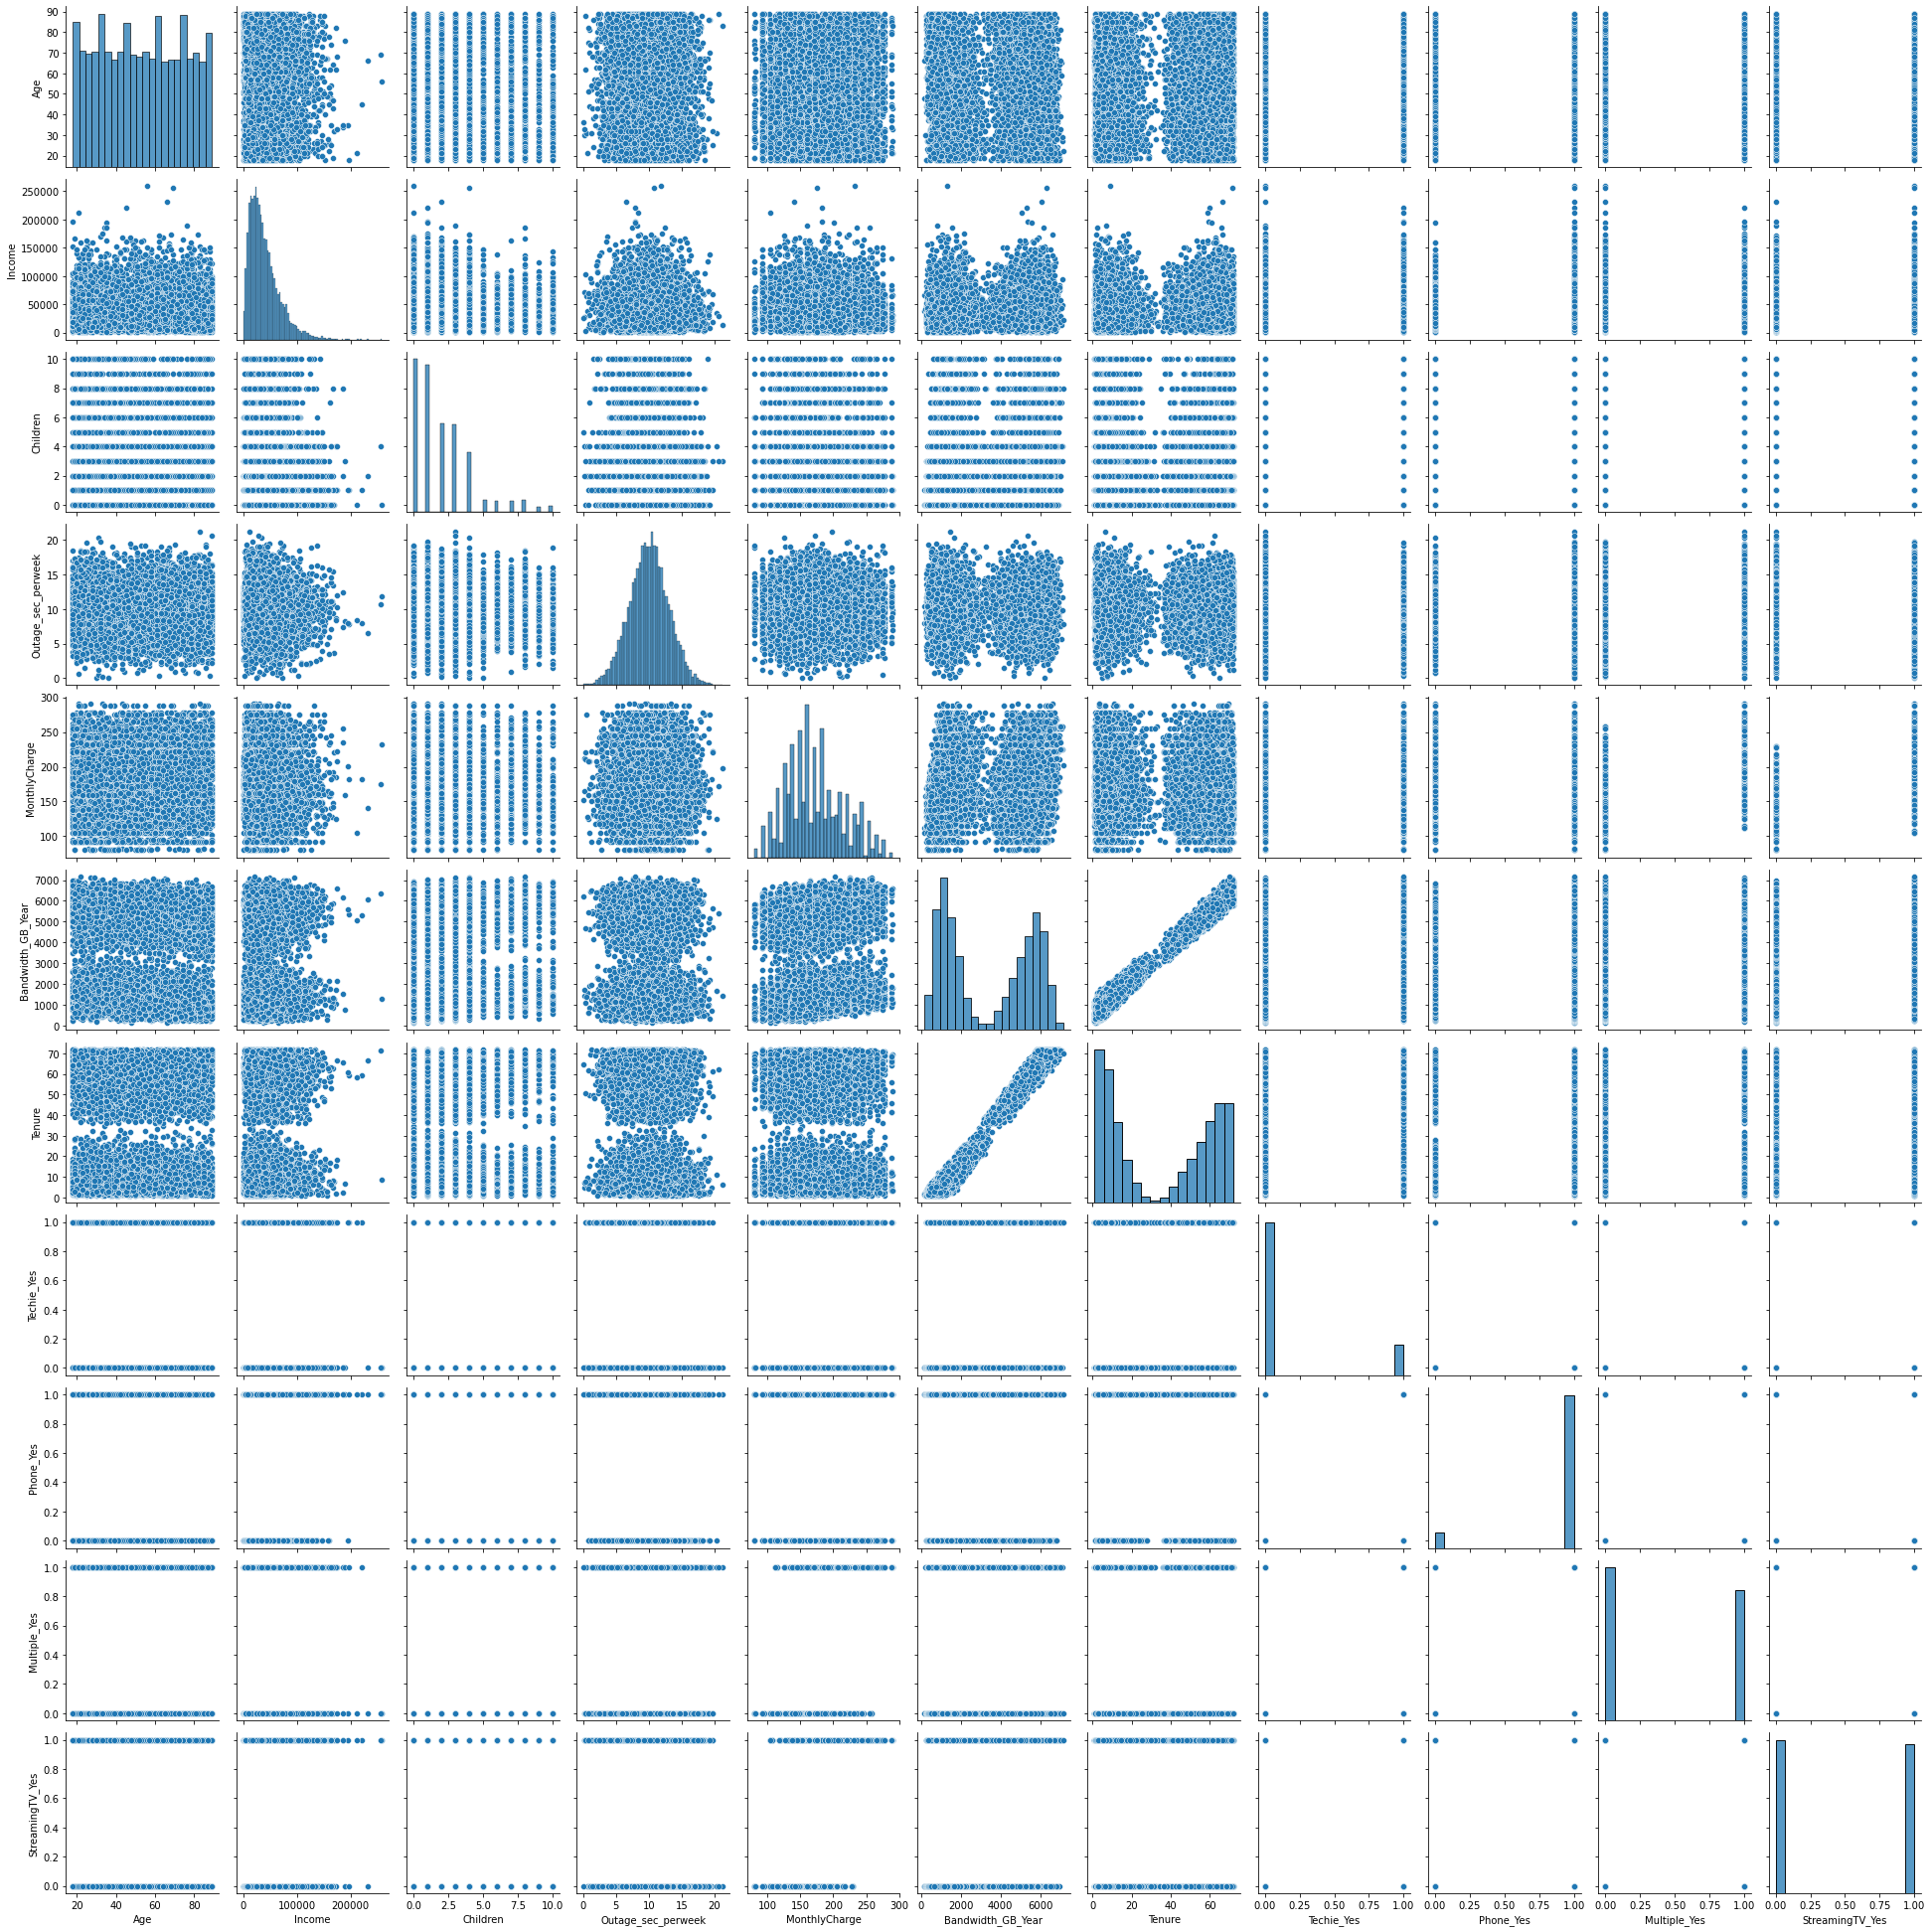

In [43]:
#plotting using pairplot
sns.pairplot(df1)

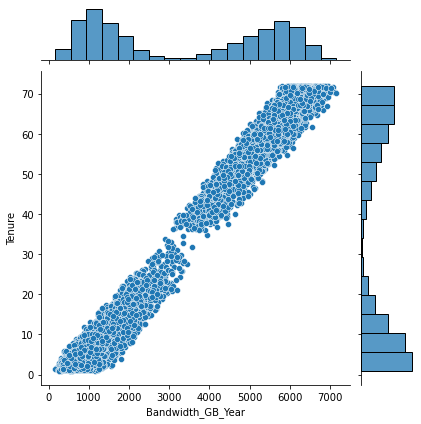

In [44]:
#correlation without reg line

sns.jointplot(data = df1, x = df1['Bandwidth_GB_Year'], y = df1['Tenure'])

<AxesSubplot:xlabel='Bandwidth_GB_Year', ylabel='Tenure'>

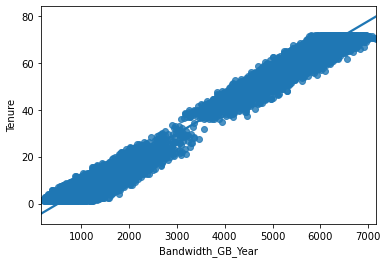

In [45]:
#correlation with reg line

sns.regplot(data = df1, x = df1['Bandwidth_GB_Year'], y = df1['Tenure'])

In [46]:
#setting up regression analysis variables

y = df1['Tenure']
X = df1[['Age', 'Income', 'Children', 'Outage_sec_perweek', 'MonthlyCharge',
       'Bandwidth_GB_Year','Techie_Yes', 'Phone_Yes',
       'Multiple_Yes', 'StreamingTV_Yes']]

In [47]:
#importing regression training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
#importing linear regression and fitting to our training data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
#printing our regression coefficients 
print(lm.coef_)

[ 3.82483879e-02 -1.51061126e-06 -3.85037034e-01 -5.01555536e-04
 -3.25402816e-02  1.20671162e-02 -7.13818645e-02 -6.35203016e-02
  1.73862537e-01 -1.35871440e+00]


In [50]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

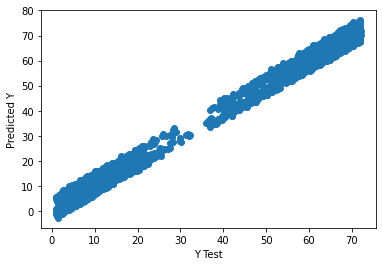

In [51]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [52]:
#graphing our mean of absolute errors 

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.388991906019299
MSE: 7.154710993747462
RMSE: 2.674829152253927


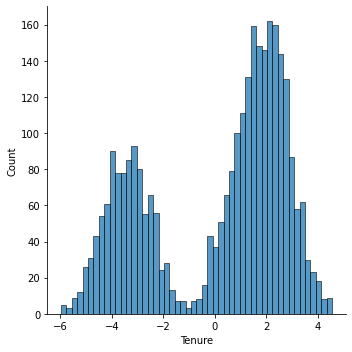

In [53]:
#graphing residuals 

sns.displot((y_test-predictions),bins=50);

In [54]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Age,0.038248
Income,-0.000002
Children,-0.385037
Outage_sec_perweek,-0.000502
MonthlyCharge,-0.032540
Bandwidth_GB_Year,0.012067
Techie_Yes,-0.071382
Phone_Yes,-0.063520
Multiple_Yes,0.173863
StreamingTV_Yes,-1.358714


In [55]:
import statsmodels.api as sm
results = sm.OLS(y, X).fit()

In [56]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.575e+05
Date:                Tue, 25 May 2021   Prob (F-statistic):                        0.00
Time:                        22:20:38   Log-Likelihood:                         -24134.
No. Observations:               10000   AIC:                                  4.829e+04
Df Residuals:                    9990   BIC:                                  4.836e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

[ 0.03825974 -0.38516796 -0.03253203  0.01206722  0.17479772 -1.35953886]


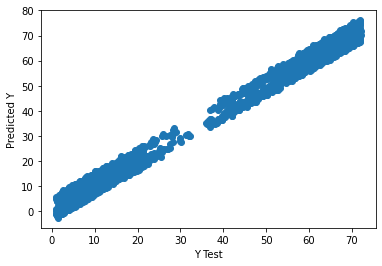

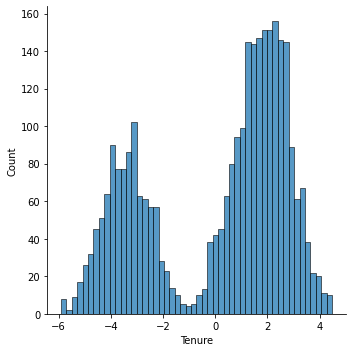

In [57]:
#reduced model
y = df1['Tenure']
X = df1[['Age', 'Children', 'MonthlyCharge','Bandwidth_GB_Year','Multiple_Yes', 'StreamingTV_Yes']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.coef_)
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
sns.displot((y_test-predictions),bins=50);

In [58]:
results = sm.OLS(y, X).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Tenure   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.270e+05
Date:                Tue, 25 May 2021   Prob (F-statistic):                        0.00
Time:                        22:22:17   Log-Likelihood:                         -24162.
No. Observations:               10000   AIC:                                  4.834e+04
Df Residuals:                    9994   BIC:                                  4.838e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------